# The purpose of this study is to segment the customers based on RFM analysis ie Recency, Frequency and Monetary value so that the company can target its customers efficiently

In [1]:
#Importing the required libraries
import pandas as pd
import numpy as np

#Importing visualisation libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Importing statistical libraries
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

#Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Retail_dataset.csv', sep=',', encoding='ISO-8859-1', header=0)
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,09-12-2011 12:50,4.95,12680.0,France


In [5]:
df.shape #The dataframe has 541909 rows and 8 columns

(541909, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [7]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


As we can see from the above all the columns are extremely skewed to the right

# Data Cleaning

In [8]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
#dropping all the missing values
df = df.dropna()
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,09-12-2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,09-12-2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,09-12-2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,09-12-2011 12:50,4.15,12680.0,France


In [10]:
df.shape #The shape of the df is now 406829 rows and 8 columns

(406829, 8)

In [11]:
#Changing the business ID to string type

df['CustomerID'] = df['CustomerID'].astype(str)

In [12]:
df['CustomerID'].dtypes 

dtype('O')

As we can see it's successfully changed the type from float to string

# Data Preparation

Analysing the customers based on 3 factors i.e RFM

1. Recency = number of days since last purchase
2. Frequency = number of transactions
3. Monetary = total number of transactions (monetary value)

In [13]:
#Creating a new column Amount for Monetary analysis

df['Amount'] = df['Quantity'] * df['UnitPrice']
cross_tab = df.groupby('CustomerID')['Amount'].sum().reset_index()
cross_tab.head()

,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [14]:
#Creating a column for Frequency analysis 

cross_tab2 = df.groupby('CustomerID')['InvoiceNo'].count().reset_index()
cross_tab2.columns = ['CustomerID', 'Frequency']
cross_tab2.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [15]:
#Merging the 2 df's

rfm = pd.merge(cross_tab, cross_tab2, on='CustomerID', how='inner')
rfm.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [16]:
rfm.shape

(4372, 3)

In [17]:
#New attribute recency by first converting the date time into the right datetime

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d-%m-%Y %H:%M')
df['InvoiceDate']

#Computing the max to know the last transaction date

max_date = max(df['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [18]:
df['Diff'] = max_date - df['InvoiceDate']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,Diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [19]:
df['Diff'] = df['Diff'].dt.days
df['Diff'].head()

0    373
1    373
2    373
3    373
4    373
Name: Diff, dtype: int64

In [20]:
cross_tab3 = df.groupby('CustomerID')['Diff'].min().reset_index()
cross_tab3.head()

,CustomerID,Diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [21]:
#Now we have all the columns for analysis ie. RFM and their subsequent customerID
rfm = pd.merge(rfm, cross_tab3, on='CustomerID', how='inner')
rfm

,CustomerID,Amount,Frequency,Diff
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309
...,...,...,...,...
4367,18280.0,180.60,10,277
4368,18281.0,80.82,7,180
4369,18282.0,176.60,13,7
4370,18283.0,2094.88,756,3


In [22]:
#Renaming the columns for better understanding
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.columns

Index(['CustomerID', 'Amount', 'Frequency', 'Recency'], dtype='object')

In [23]:
rfm.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


# There are 2 types of outliers:

1. Statistical 
2. Domain Specific

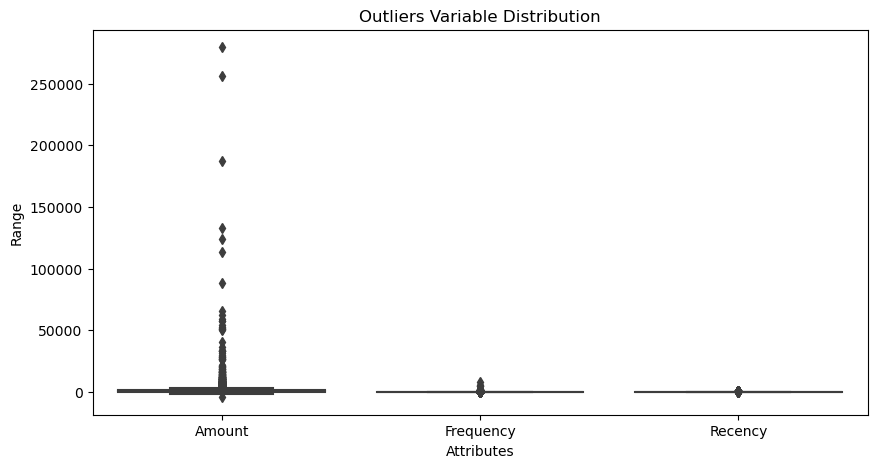

In [24]:
#Lets analyse the outliers in RFM - Recency, Frequency and Amount

#creating a variable with the required column names
attributes = ['Amount', 'Frequency', 'Recency']

#Plotting the parameters of the attributes from the dataset rfm
plt.rcParams['figure.figsize'] = [10,5]
sns.boxplot(data=rfm[attributes])

#renaming the x, y and the title
plt.title('Outliers Variable Distribution')
plt.xlabel('Attributes')
plt.ylabel('Range')
plt.show()

As we can see here the amount column is extremely skewed to the right so let's fix that

In [25]:
#Removing statistical outliers for Amount

Q1 = rfm['Amount'].quantile(0.05)
Q3 = rfm['Amount'].quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm['Amount'] >= Q1 - 1.5*IQR) & (rfm['Amount'] <= Q3 + 1.5*IQR)]


#Removing statistical outliers for Recency 

Q1 = rfm['Recency'].quantile(0.05)
Q3 = rfm['Recency'].quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm['Recency'] >= Q1 - 1.5*IQR) & (rfm['Recency'] <= Q3 + 1.5*IQR)]

#Remvoing statistical outliers for Frequency 

Q1 = rfm['Frequency'].quantile(0.05)
Q3 = rfm['Frequency'].quantile(0.95)
IQR = Q3-Q1
rfm = rfm[(rfm['Frequency'] >= Q1 - 1.5*IQR) & (rfm['Frequency'] <= Q3 + 1.5*IQR)]

In [26]:
rfm.shape

(4293, 4)

# Rescaling the attributes

Rescaling is important as it rescales the attributes to have comparable scale. Here we are using standardisation sclaing

In [27]:
rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

#Instating standard scaler
scaler = StandardScaler()

#scale the model
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [28]:
#It's good practice to restore the scaled info by creating a pd.DataFrame
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.723738,-0.752888,2.301611
1,1.731617,1.042467,-0.906466
2,0.300128,-0.463636,-0.183658
3,0.277517,-0.044720,-0.738141
4,-0.533235,-0.603275,2.143188


In [29]:
#Initialising the model by setting the number of clusters at random so here it's 4
kmeans = KMeans(n_clusters=4, max_iter=50)

#Fitting the model
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [30]:
#Labels provide us info on which cluster the customer id can be classified under since the number of clusters 
#set here are 4 the possibility is 0,1,2,3 labels
kmeans.labels_

array([0, 3, 1, ..., 0, 1, 1], dtype=int32)



# Elbow method

Elbow method is an popular method to find the value of k i.e the optimal number of clusters

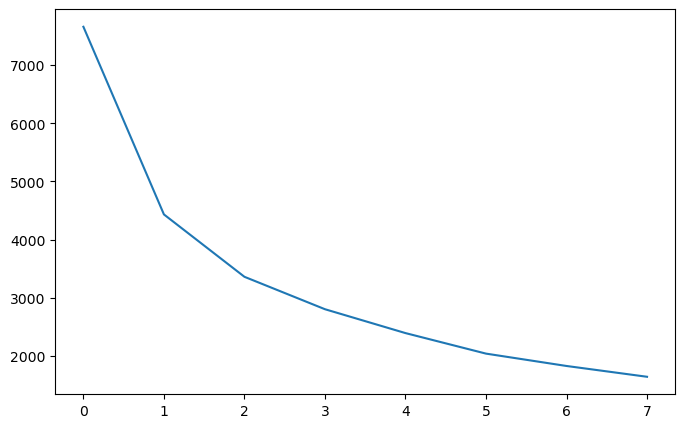

In [31]:
# Elbow curve to find the optimal clusters by analysing the curve 

#first create an empty dataset 
ssd = []

#setting random range of clusters for analysis
range_clusters = [2,3,4,5,6,7,8,9]

#segementing for each value in the range of clusters to find the optimal value
for num_clusters in range_clusters:
    kmeans = KMeans(n_clusters = num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)

#plotting the graph
plt.figure(figsize=(8,5))
plt.plot(ssd)

In [32]:
#setting a random range of clusters for analysis
range_clusters = [2,3,4,5,6,7,8,9]

#segementing for each value in the range of clusters to find the optimal silhouette value/score.
for n_clusters2 in range_clusters:
    kmeans2 = KMeans(n_clusters=n_clusters2, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    #silhouette score
    silhouetee_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0} the silhouette score is {1}".format(n_clusters2, silhouetee_avg))
    
    

For n_clusters=2 the silhouette score is 0.4151281279660008
For n_clusters=3 the silhouette score is 0.41520226428882334
For n_clusters=4 the silhouette score is 0.41235591926349685
For n_clusters=5 the silhouette score is 0.4122682177195665
For n_clusters=6 the silhouette score is 0.4141121438922509
For n_clusters=7 the silhouette score is 0.4153573636071236
For n_clusters=8 the silhouette score is 0.4146176908963619
For n_clusters=9 the silhouette score is 0.41995800331327665


In [33]:
#Lets build a model for number of clusters 5 since it has got compartively higher silhouette score and 
#also on the basis of elbow method

Kmeans3 = KMeans(n_clusters = 5, max_iter=50)
Kmeans3.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=5)

In [34]:
Kmeans3.labels_

array([1, 0, 2, ..., 1, 2, 2], dtype=int32)

In [35]:
#Applying the labels to each of the customer ID for analysis
rfm['Labels'] = Kmeans3.labels_
rfm.head()

,CustomerID,Amount,Frequency,Recency,Labels
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1


In [36]:
#Replacing the old set of labels to the new ones
rfm['Labels'] = rfm['Labels'].replace((0,1,2,3,4), (1,2,3,4,5))

<Axes: xlabel='Labels', ylabel='Amount'>

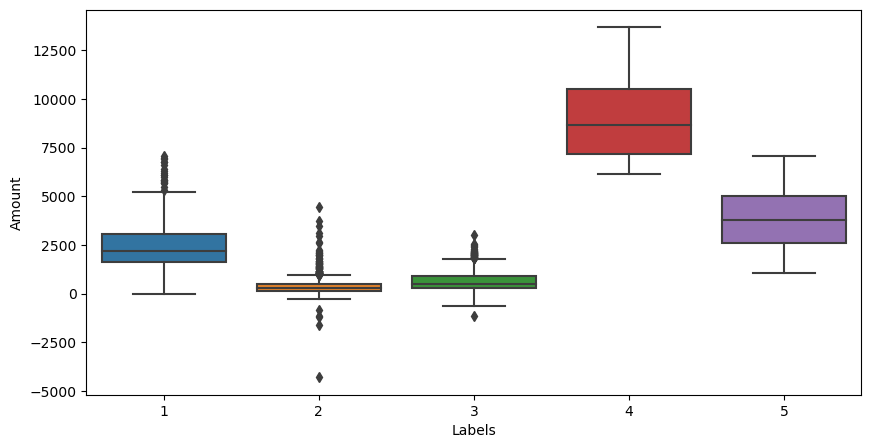

In [37]:
#Lets vislualise the clusters and their relationships btw Amount, Frequency and Recency
sns.boxplot(x='Labels', y='Amount', data=rfm)

<Axes: xlabel='Labels', ylabel='Frequency'>

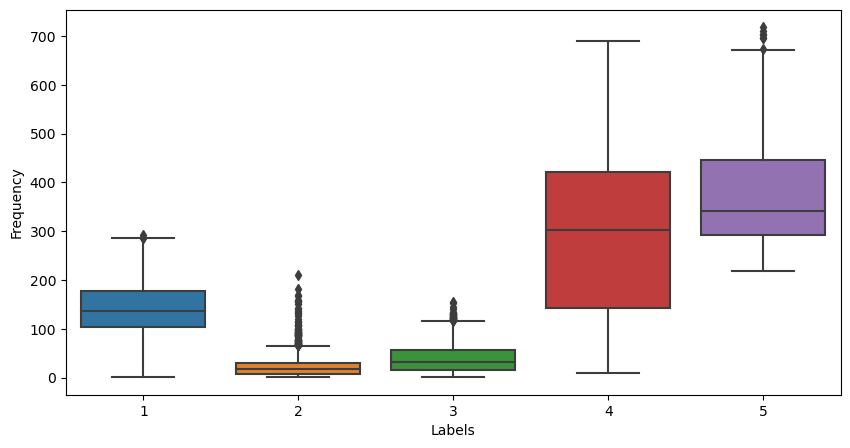

In [38]:
sns.boxplot(x='Labels', y='Frequency', data=rfm)

<Axes: xlabel='Labels', ylabel='Recency'>

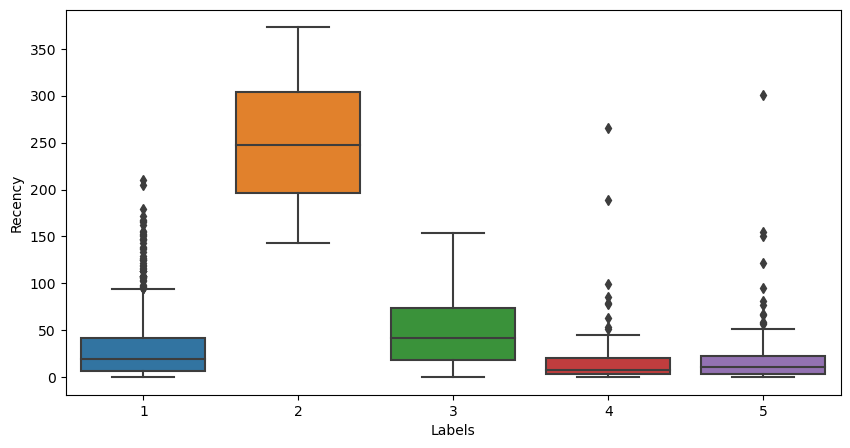

In [39]:
sns.boxplot(x='Labels', y='Recency', data=rfm)

K Means clustering interpretation:-

1. Customers belonging to label 5 have the highest amount of transactions in comparison to other customer labels
2. Customers belonging to label 5 are frequent buyers
3. Customers belonging to label 4 are not recent buyers so less importance on them